Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB

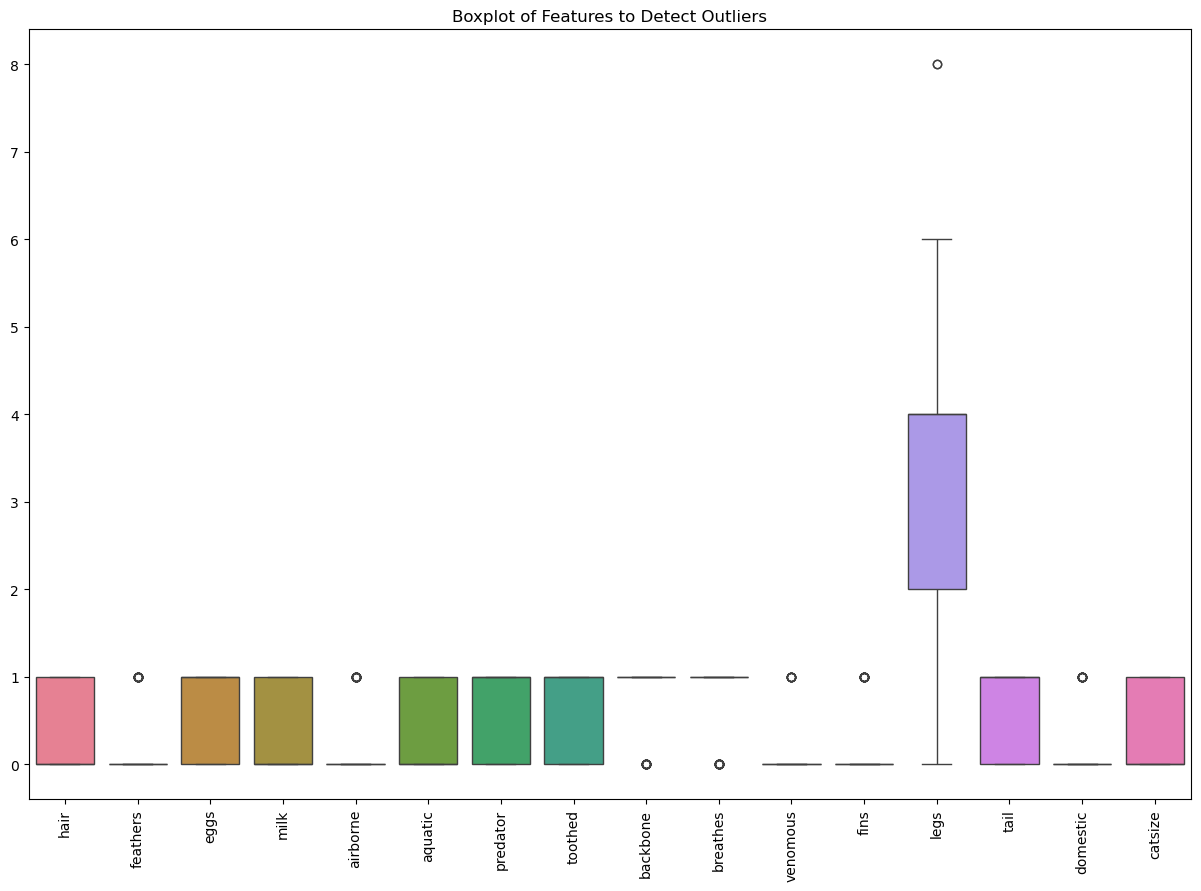

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Zoo.csv')

print("Initial DataFrame Info:")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("-" * 50)

# The 'animal name' column is an identifier and not a feature for classification.
# The 'type' column is the target variable.
# Separate features (X) and target (y)
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Check for missing values
print("Missing values per column:\n", X.isnull().sum())
# The output will show no missing values, so no imputation is needed.

# Visualize data distributions to check for outliers (using boxplots)
# This helps in understanding the range of values and identifying potential outliers.
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title('Boxplot of Features to Detect Outliers')
plt.xticks(rotation=90)
plt.show()

# Based on the boxplot, most features are binary (0 or 1), so standard outlier treatment is not applicable.
# We will not remove outliers since they represent valid animal characteristics.

# Standardize features for KNN
# KNN is a distance-based algorithm, so scaling is crucial for its performance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

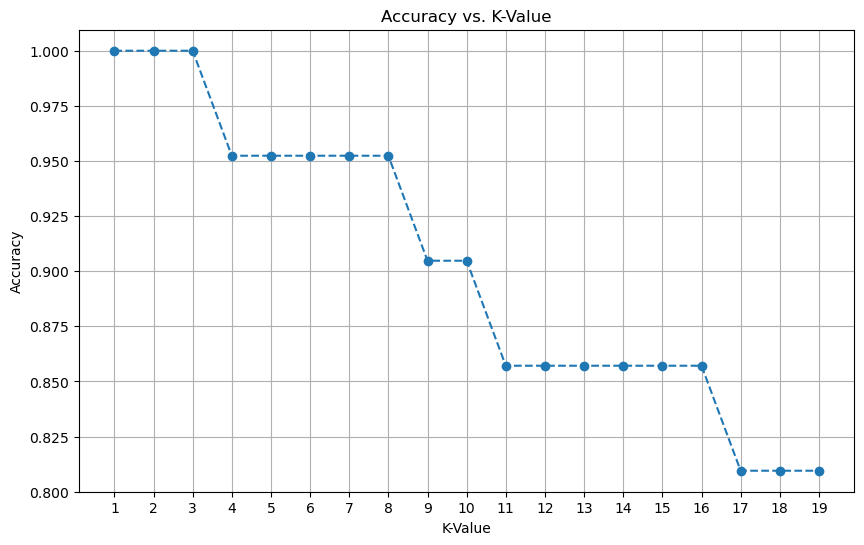

The optimal K value is: 1 with an accuracy of 1.00
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [2]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Choose an appropriate value for K ---
# We'll use a loop to find the best K value based on accuracy.
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--')
plt.title('Accuracy vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal K
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"The optimal K value is: {optimal_k} with an accuracy of {max(accuracy_scores):.2f}")
print("-" * 50)

# --- Evaluate the classifier's performance ---
# Now, we train the model with the optimal K and evaluate it.
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

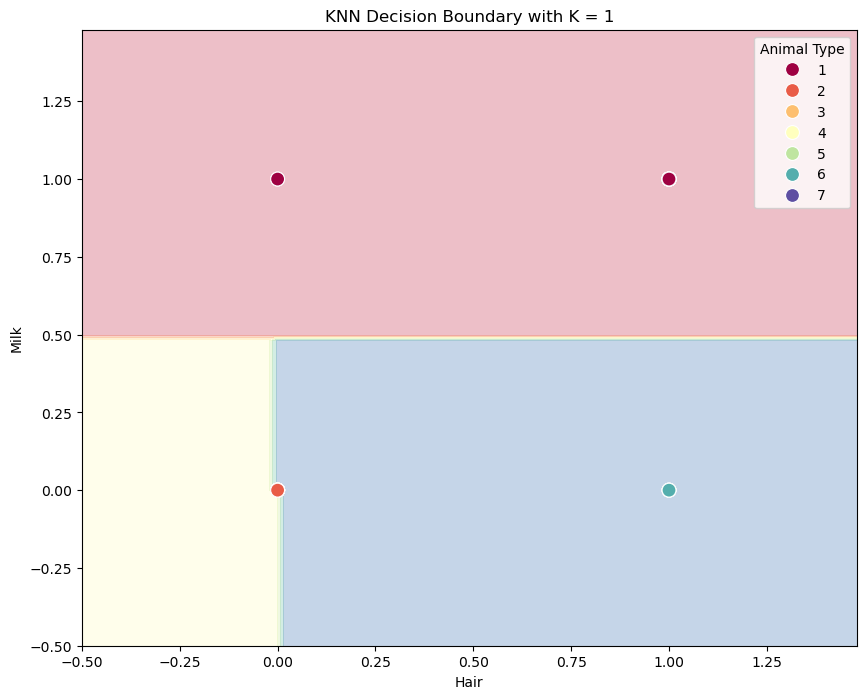

In [3]:
# --- Visualize the decision boundaries ---
# For visualization, we'll use a subset of the original data to make the plot
# We select two features with the most clear separation for a meaningful visualization.
features_to_plot = ['hair', 'milk']
X_plot = X[features_to_plot].values
y_plot = y.values

# Create a mesh grid of points to plot the decision boundary
x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Use the best K value from the previous step to train the model
knn_plot = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_plot.fit(X_plot, y_plot)

# Predict the class for each point in the mesh grid
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=y_plot, palette=sns.color_palette("Spectral", as_cmap=True),
                legend='full', s=100)
plt.title(f'KNN Decision Boundary with K = {optimal_k}')
plt.xlabel('Hair')
plt.ylabel('Milk')
plt.legend(title='Animal Type')
plt.show()

In [ ]:
''' 
Interview Questions:
1. What are the key hyperparameters in KNN?

The two most important hyperparameters in KNN are:

n_neighbors (or K): This is the number of neighbors to consider when making a prediction. A small K can make the model sensitive to noise 
and outliers, while a large K can smooth out the decision boundaries but might miss local patterns.

distance_metric: This determines how the distance between data points is calculated. The choice of metric is critical as
it directly influences which neighbors are considered "nearest." Common choices include Euclidean, Manhattan, and Minkowski distance.

''''

In [ ]:
'''
2. What distance metrics can be used in KNN?

There are several distance metrics that can be used, with the most common being:

Euclidean Distance: This is the standard straight-line distance between two points. It is the most widely used metric for continuous features.

Manhattan Distance: Also known as L1 norm or taxicab distance, this metric calculates the sum of the absolute differences between the coordinates
of two points. It is useful when features are not necessarily straight lines, such as in grids.

Minkowski Distance: This is a generalization of both Euclidean and Manhattan distances. By changing a single parameter (p), 
it can be adjusted to be either of the other two. When p=1, it is the Manhattan distance, and when p=2, it is the Euclidean distance.

'''